# Importing Modules

**All the necessary modules are imported here**

In [1]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge,LassoCV, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
from sklearn.model_selection import cross_validate #Additional scklearn functions
from sklearn.model_selection import cross_val_score
from matplotlib.pylab import rcParams
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [2]:
#library imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

C:\Users\raobk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\raobk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\raobk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\raobk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

## Data Pre-Processing

In [3]:
cement_train=pd.read_csv('train_data.csv')
cement_test=pd.read_csv('test_data.csv')

In [4]:
cement_train.head(5)

,cement,blast,flyash,water,sp,ca,fa,age,strength
0,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7,24.00
1,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
2,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
3,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
4,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70


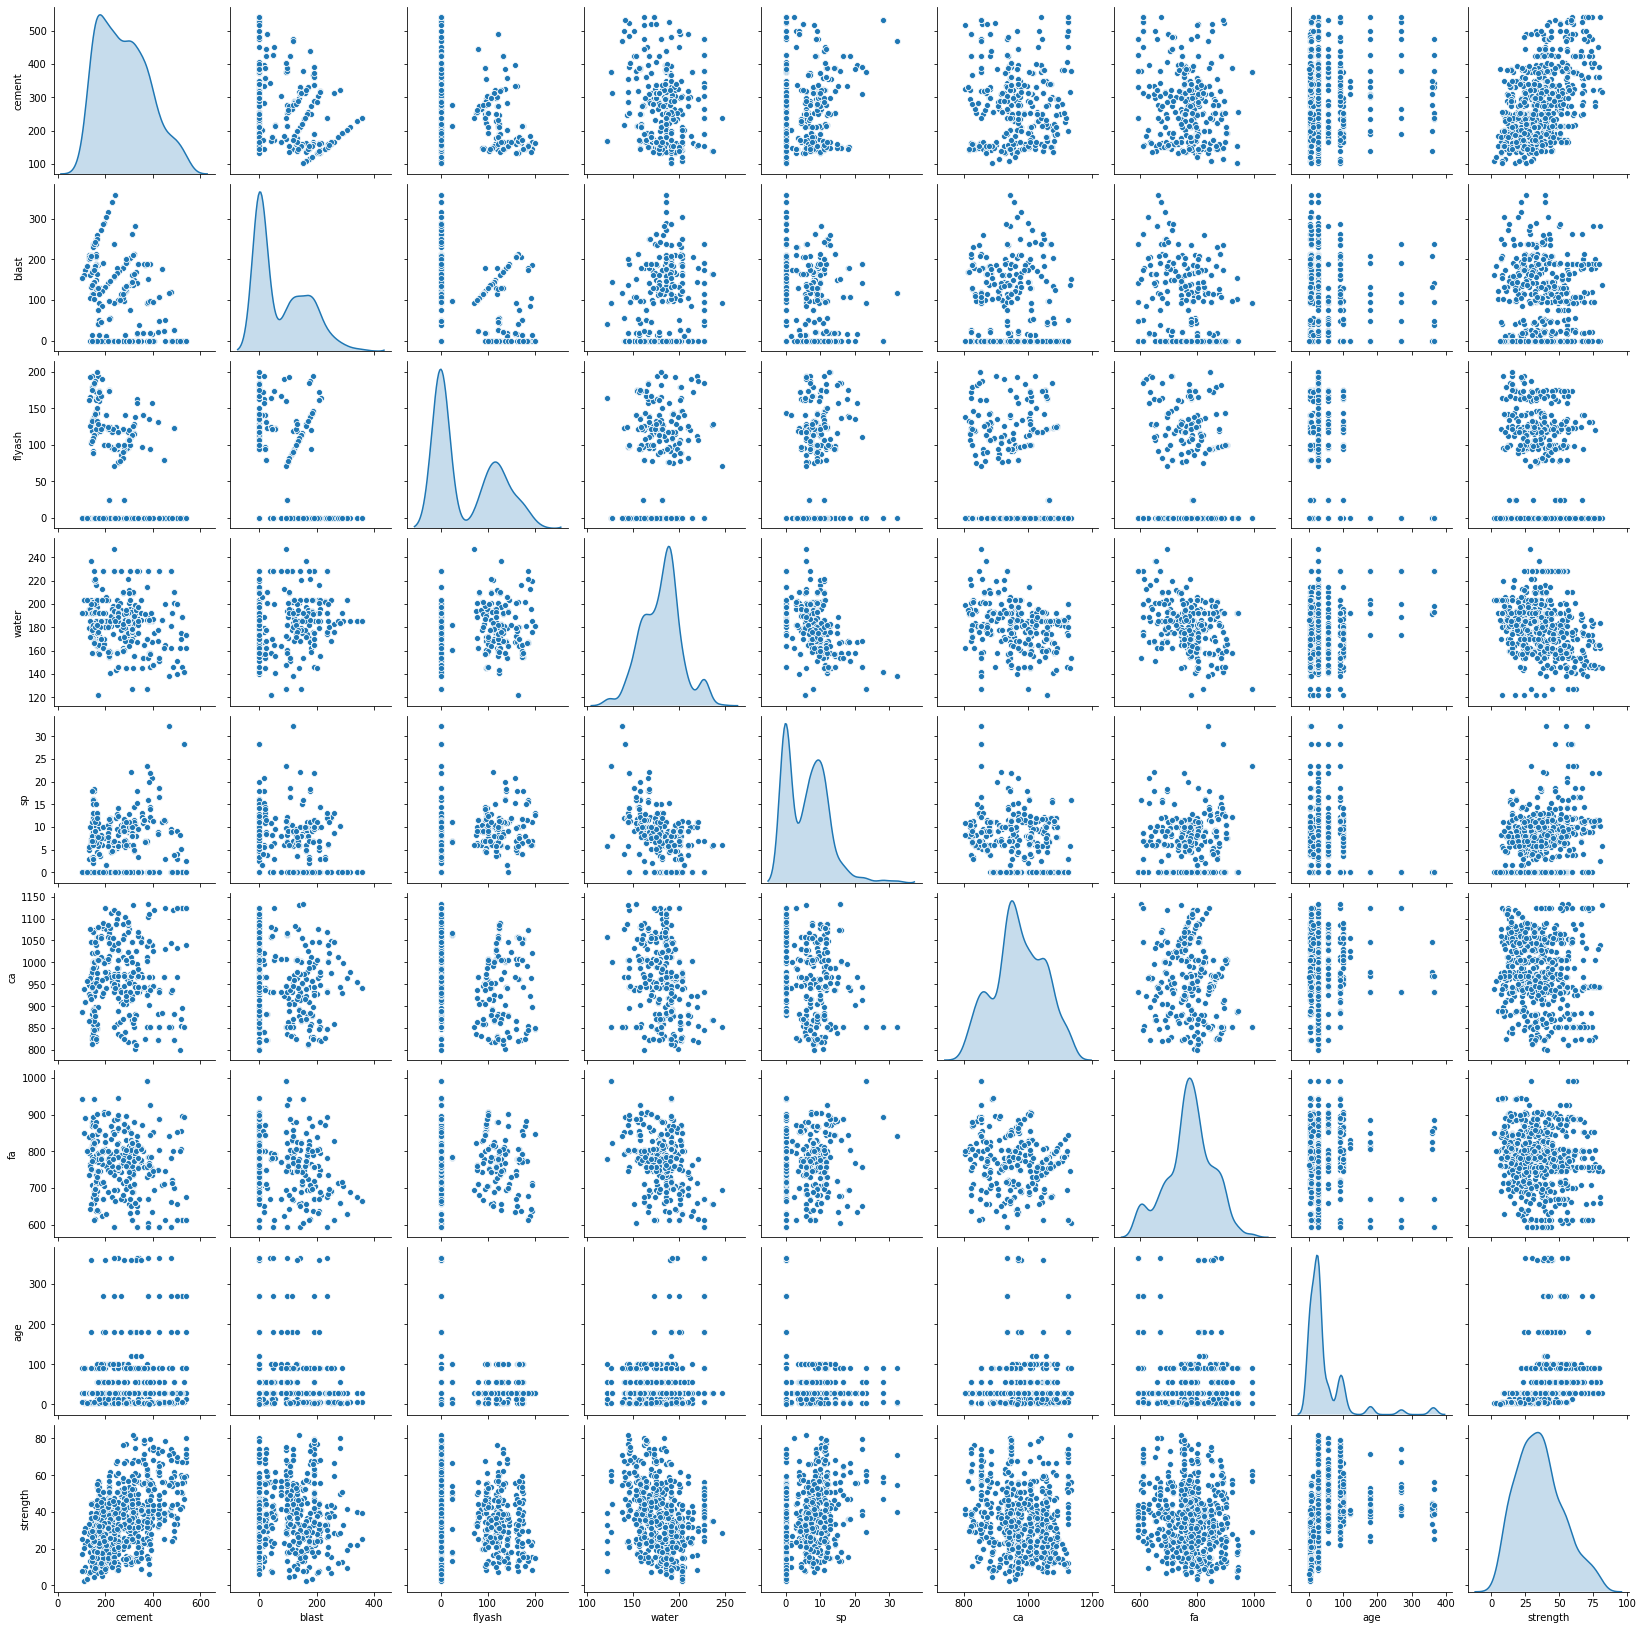

In [5]:
sns.pairplot(cement_train, diag_kind='kde')

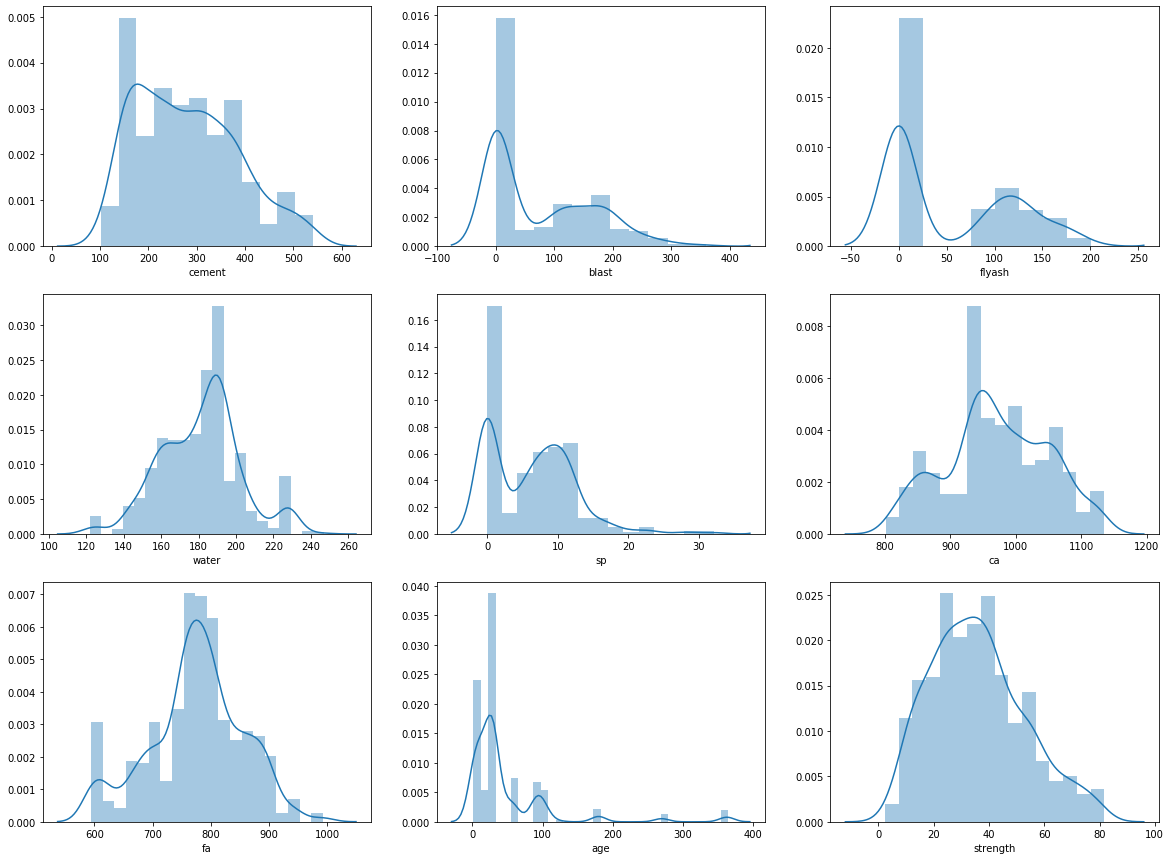

In [6]:
var=np.arange(1,len(cement_train.columns)+1)
var
from IPython.core.pylabtools import figsize
figsize(20, 15)
for i in var:
    plt.subplot(3,3,i)
    sns.distplot(cement_train.iloc[:,(i-1)])

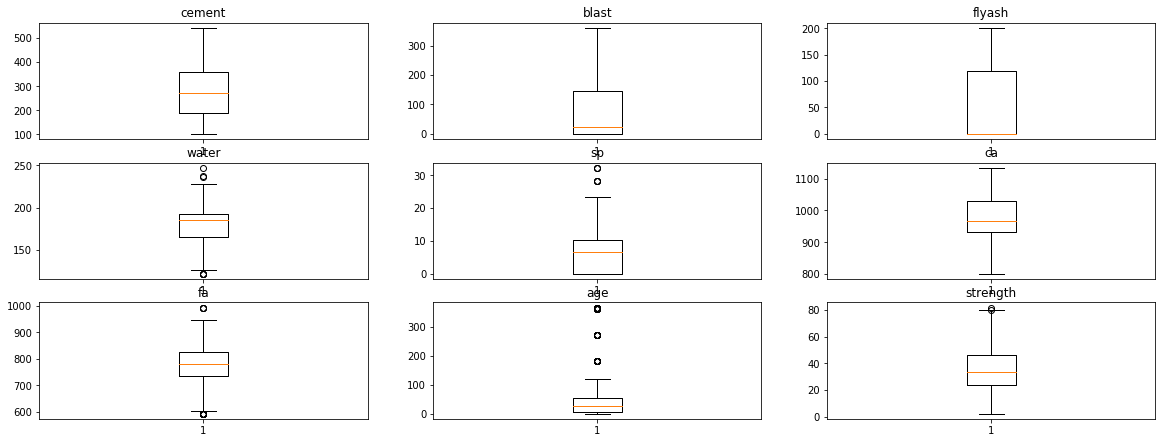

In [7]:
# Check for outliers
figsize(20, 15)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(cement_train.iloc[:,(i-1)])
    plt.title(cement_train.columns[i-1])

In [8]:
Q1=np.percentile(cement_train['fa'],25)
Q3=np.percentile(cement_train['fa'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_train.fa=np.where(cement_train.fa>UL, UL,cement_train.fa)

In [9]:
Q1=np.percentile(cement_train['water'],25)
Q3=np.percentile(cement_train['water'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_train.water=np.where(cement_train.water>UL, UL,cement_train.water)

In [10]:
Q1=np.percentile(cement_train['age'],25)
Q3=np.percentile(cement_train['age'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_train.age=np.where(cement_train.age>UL, UL,cement_train.age)

In [11]:
Q1=np.percentile(cement_train['sp'],25)
Q3=np.percentile(cement_train['sp'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_train.sp=np.where(cement_train.sp>UL, UL,cement_train.sp)

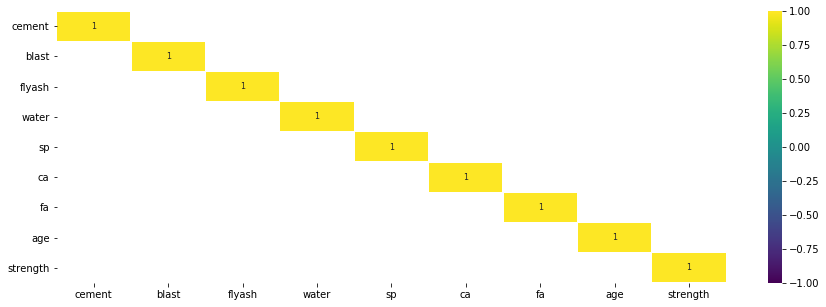

In [12]:
corr=cement_train.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.70) | (corr <= -0.70)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

# Check for outliers
figsize(20, 15)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(cement_test.iloc[:,(i-2)])
    plt.title(cement_test.columns[i-2])

In [ ]:
Q1=np.percentile(cement_test['age'],25)
Q3=np.percentile(cement_test['age'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_test.age=np.where(cement_test.age>UL, UL,cement_test.age)

In [ ]:
Q1=np.percentile(cement_test['cement'],25)
Q3=np.percentile(cement_test['cement'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_test.cement=np.where(cement_test.cement>UL, UL,cement_test.cement)

In [ ]:
Q1=np.percentile(cement_test['water'],25)
Q3=np.percentile(cement_test['water'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_test.water=np.where(cement_test.water>UL, UL,cement_test.water)

In [ ]:
Q1=np.percentile(cement_test['sp'],25)
Q3=np.percentile(cement_test['sp'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_test.sp=np.where(cement_test.sp>UL, UL,cement_test.sp)

In [ ]:
Q1=np.percentile(cement_test['fa'],25)
Q3=np.percentile(cement_test['fa'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
cement_test.fa=np.where(cement_test.fa>UL, UL,cement_test.fa)

In [13]:
cement_test.isnull().sum()

cement    0
blast     0
flyash    0
water     0
sp        0
ca        0
fa        0
age       0
dtype: int64


 mu = 35.85 and sigma = 16.98



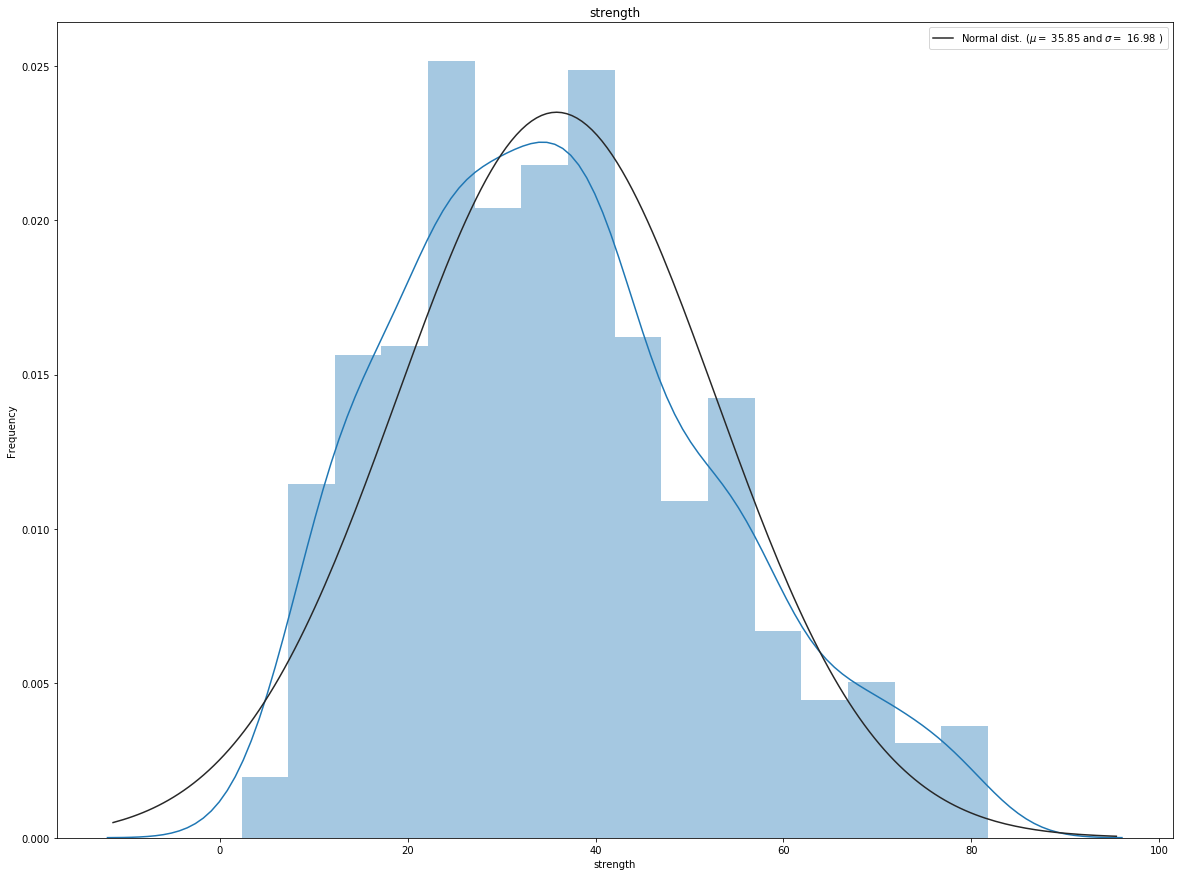

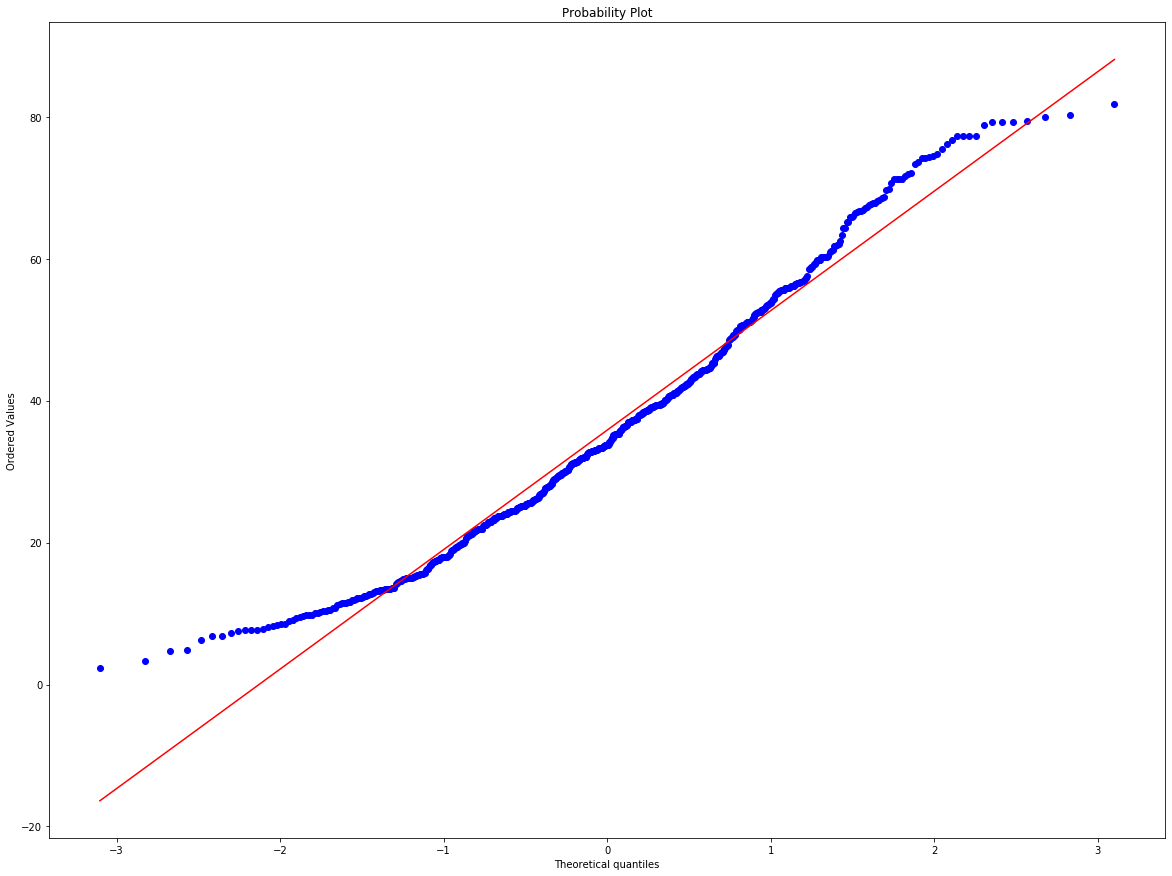

In [14]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(cement_train['strength'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(cement_train['strength'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('strength')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(cement_train['strength'], plot=plt)
plt.show()


 mu = 3.48 and sigma = 0.53



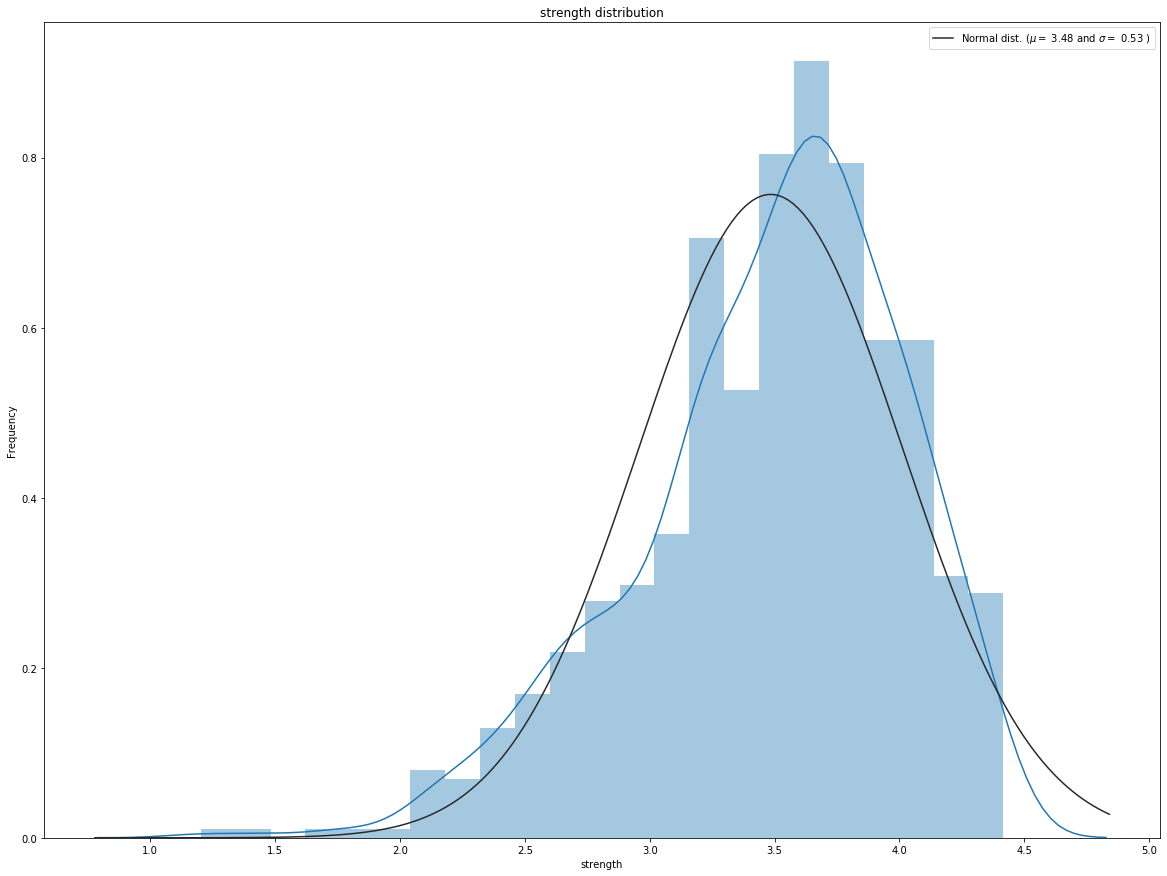

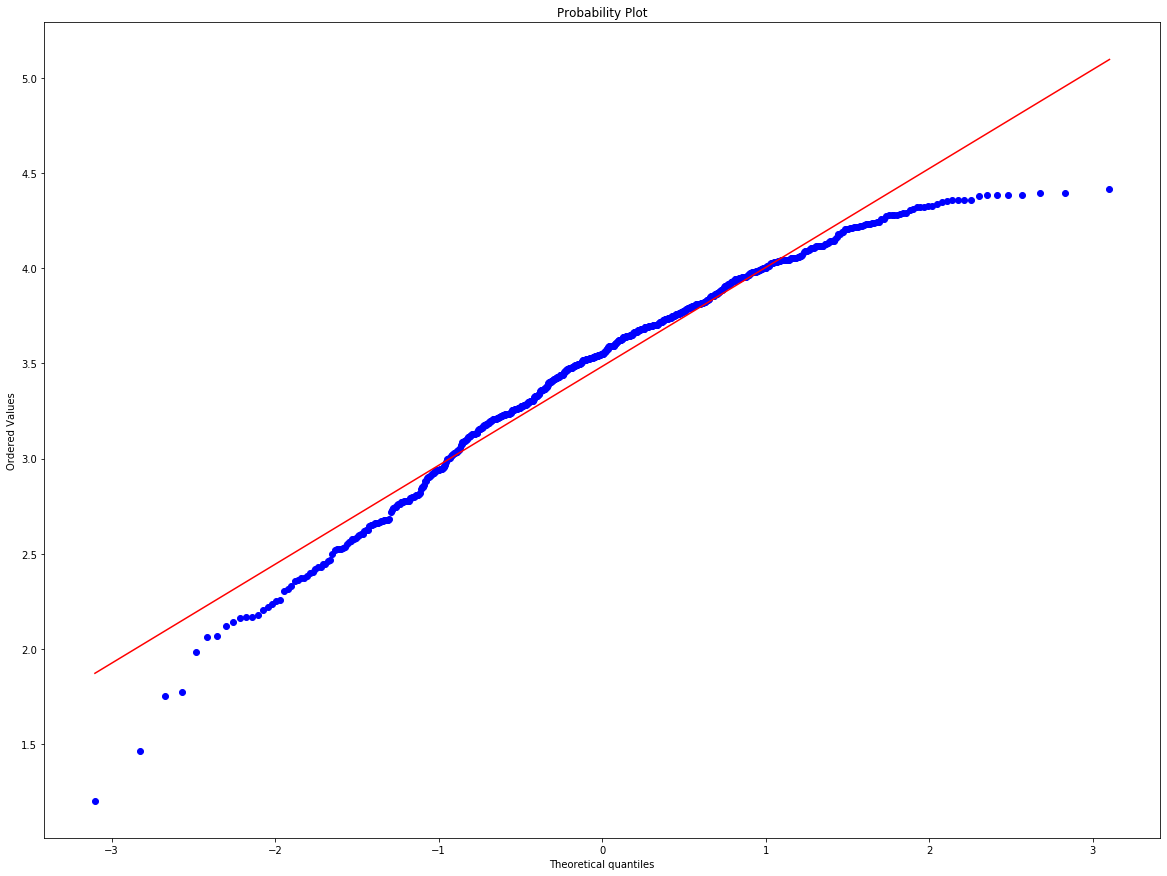

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
from scipy import stats
from scipy.special import boxcox1p
lam=0.43
cement_train["strength"] = np.log1p(cement_train["strength"])

#Check the new distribution 
sns.distplot(cement_train['strength'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(cement_train['strength'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('strength distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(cement_train['strength'], plot=plt)
plt.show()

In [16]:
pd.Series(cement_train['strength']).skew()

-0.7377553799633785

In [17]:
# Skew and kurt
print("Skewness: %f" % cement_train['strength'].skew())
print("Kurtosis: %f" % cement_train['strength'].kurt())

Skewness: -0.737755
Kurtosis: 0.530202


In [18]:
ntrain = cement_train.shape[0]
ntest = cement_test.shape[0]
y_train = cement_train.strength.values
all_data = pd.concat((cement_train,cement_test)).reset_index(drop=True)
all_data.drop(['strength'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1030, 8)


In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [20]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [21]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
age,2.978781
blast,0.799550
sp,0.756834
flyash,0.536571
cement,0.508739
water,0.056284
ca,-0.040161
fa,-0.280916


In [22]:
skewness = skewness[abs(skewness) >=0.05]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = ['age', 'blast', 'sp', 'flyash', 'cement', 'water']
lam = 0.15
for feat in skewed_features:
    all_data[feat] =boxcox1p(all_data[feat],lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 8 skewed numerical features to Box Cox transform


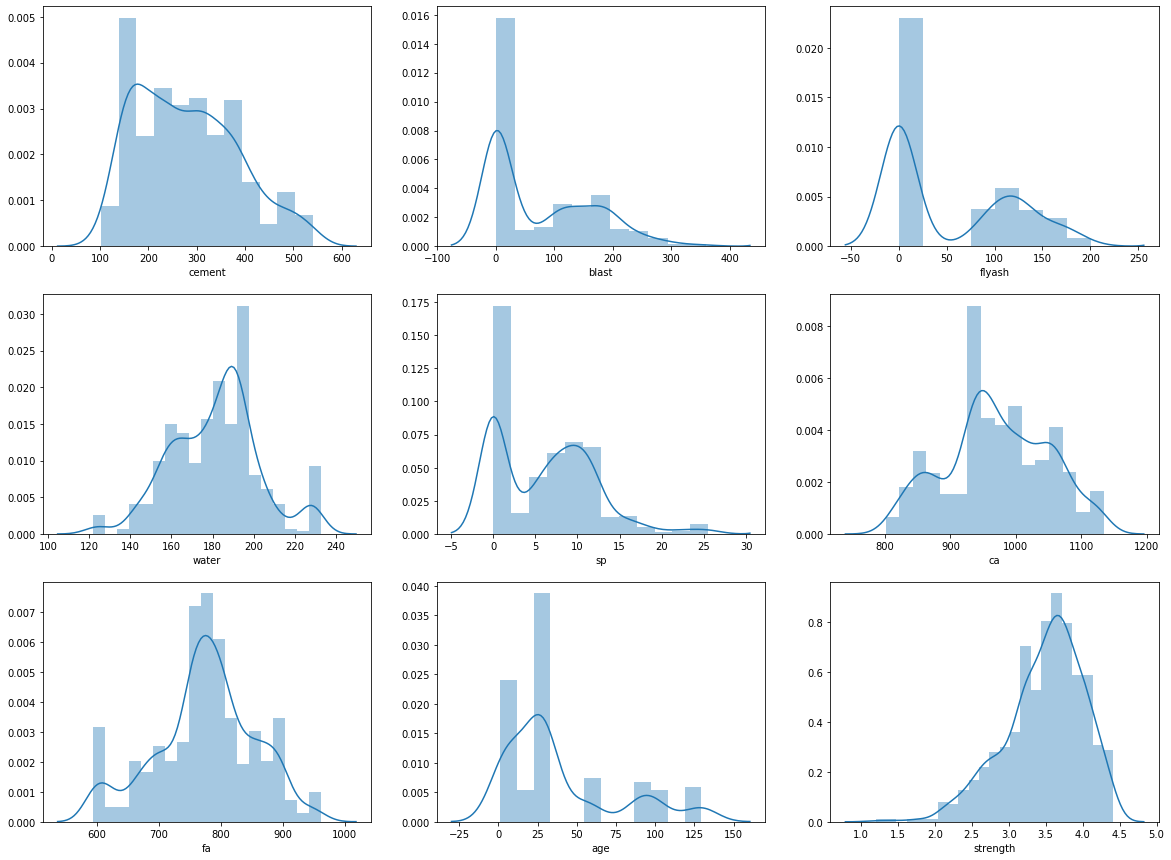

In [23]:
var=np.arange(1,len(cement_train.columns)+1)
var
from IPython.core.pylabtools import figsize
figsize(20, 15)
for i in var:
    plt.subplot(3,3,i)
    sns.distplot(cement_train.iloc[:,(i-1)])

In [24]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1030, 8)


In [25]:
cement_train = all_data[:ntrain]
cement_test = all_data[ntrain:]

# Modelling

In [26]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(cement_train.values)
    rmse= np.sqrt(-cross_val_score(model,cement_train.values,y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [27]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [29]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [30]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [31]:
model_xgb = xgb.XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


In [32]:
model_lgb = lgb.LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [33]:
score = rmsle_cv(rf)
print("\nrandom forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


random forest score: 0.1934 (0.0103)



In [34]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1664 (0.0092)



In [35]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1338 (0.0067)



In [36]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[23:31:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost score: 0.1940 (0.0116)



In [37]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1802 (0.0209)



In [38]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.2372 (0.0123)



In [39]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [40]:
averaged_models = AveragingModels(models = (rf, GBoost, model_lgb, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1457 (0.0098)



In [41]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [42]:
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost, model_lgb,KRR),
                                                 meta_model = rf)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1418 (0.0090)


In [43]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Ensembling StackedRegressor, RandomForest and GBoost

In [44]:
stacked_averaged_models.fit(cement_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(cement_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(cement_test.values))
print(rmsle(y_train, stacked_train_pred))

0.09519596893192123


In [45]:
KRR.fit(cement_train, y_train)
KRR_train_pred = KRR.predict(cement_train)
KRR_pred = np.expm1(KRR.predict(cement_test))
print(rmsle(y_train, KRR_train_pred))

0.15514589206365323


In [46]:
rf.fit(cement_train, y_train)
rf_train_pred = rf.predict(cement_train)
rf_pred = np.expm1(rf.predict(cement_test))
print(rmsle(y_train,rf_train_pred))

0.13219491246787798


In [47]:
ENet.fit(cement_train, y_train)
ENet_train_pred = ENet.predict(cement_train)
ENet_pred = np.expm1(ENet.predict(cement_test))
print(rmsle(y_train,ENet_train_pred))

0.23288371365901467


In [48]:
GBoost.fit(cement_train, y_train)
GBoost_train_pred = GBoost.predict(cement_train)
GBoost_pred = np.expm1(GBoost.predict(cement_test.values))
print(rmsle(y_train, GBoost_train_pred))

0.06780341478224254


In [66]:
'''RMSE on the entire Train data when averaging'''
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.33 +
               rf_train_pred*0.33 + GBoost_train_pred*0.34 ))

RMSLE score on train data:
0.08685228625586196


# Ensemble prediction:

In [71]:
ensemble = stacked_pred*0.33 + rf_pred*0.33 + GBoost_pred*0.34

# Submission

In [72]:
sub = pd.DataFrame()
sub['Predicted'] =ensemble

In [73]:
sub.to_csv('Apple14s.csv',index=True)